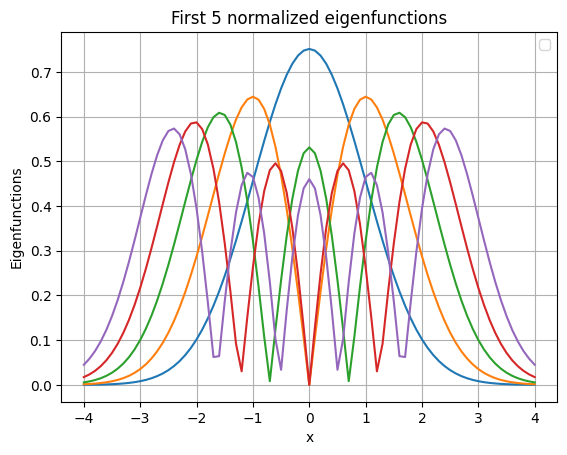

(81, 5)

In [42]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

L = 4
K = 1
x = np.arange(-L,L+0.1,0.1)
eigenfunctions = []
eigenvalues = []
epsilon= 2
col = ['r', 'b', 'g', 'c', 'm']
def bvp_rhs(y, x, epsilon):
    return [y[1], (K*x**2 - epsilon) * y[0]]

for n in range(1,6):
    depsilon = 1
    for j in range(1000):
        y0 = [1, np.sqrt(K*L**2-epsilon)*1]
        sol = odeint(bvp_rhs, y0, x, args=(epsilon,))
        sol_check = sol[-1,1]+np.sqrt(K*L**2-epsilon)*sol[-1,0]
        if abs(sol_check) < 1e-6:
            break
        if (-1)**(n+1)* sol_check > 0:
                epsilon += depsilon
        else:
                epsilon -= depsilon
                depsilon /= 2
    eigenvalues.append(epsilon)
    epsilon += 1
    norm = np.trapz(sol[:, 0]**2, x)
    normalized_phi = sol[:, 0] / np.sqrt(norm)
    eigenfunctions.append(np.abs(normalized_phi))

A1 = np.column_stack(eigenfunctions)
A2 = np.array(eigenvalues)
plt.plot(x, A1[:,0])
plt.plot(x, A1[:,1])
plt.plot(x, A1[:,2])
plt.plot(x, A1[:,3])
plt.plot(x, A1[:,4])

plt.xlabel('x')
plt.ylabel('Eigenfunctions')
plt.legend()
plt.title('First 5 normalized eigenfunctions')
plt.grid(True)
plt.show()